In [1]:
# pip install langchain


In [2]:
# pip install pandas
# !pip install matplotlib
# !pip install transformers
# !pip install -U langchain-community

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from transformers import GPT2TokenizerFast
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import OpenAI
from langchain.chains import ConversationalRetrievalChain

/home/exouser/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading PDFs/Docx and chunking with LangChain

In [4]:
!pip install python-docx transformers langchain
!pip install textract==1.6.3


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached pdfminer.six-20181108-py2.py3-none-any.whl (5.6 MB)
  Attempting uninstall: pdfminer.six
    Found existing installation: pdfminer.six 20231228
    Uninstalling pdfminer.six-20231228:
      Successfully uninstalled pdfminer.six-20231228
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdfplumber 0.11.5 requires pdfminer.six==20231228, but you have pdfminer-six 20181108 which is incompatible.


In [8]:
!pip install pdfplumber
!pip install pytesseract
## !sudo apt install tesseract-ocr-eng
# !sudo apt-get install -y liblept5 libtesseract4 tesseract-ocr tesseract-ocr-osd


Defaulting to user installation because normal site-packages is not writeable
  Using cached pdfminer.six-20231228-py3-none-any.whl (5.6 MB)
  Attempting uninstall: pdfminer.six
    Found existing installation: pdfminer.six 20181108
    Uninstalling pdfminer.six-20181108:
      Successfully uninstalled pdfminer.six-20181108
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textract 1.6.3 requires pdfminer.six==20181108, but you have pdfminer-six 20231228 which is incompatible.
Defaulting to user installation because normal site-packages is not writeable


# Semantic chunking

#  Use Sentence Transformers for Semantic Chunking

In [ ]:
# pip install sentence_transformers
# !pip install pdfplumber textract pytesseract
# !sudo apt install tesseract-ocr
# !sudo apt-get install -y libpulse-dev



Defaulting to user installation because normal site-packages is not writeable
  Using cached textract-1.6.5-py3-none-any.whl (23 kB)
  Using cached xlrd-1.2.0-py2.py3-none-any.whl (103 kB)
  Using cached textract-1.6.4.tar.gz (17 kB)
  Preparing metadata (setup.py) ... done
  Using cached SpeechRecognition-3.8.1-py2.py3-none-any.whl (32.8 MB)
  Using cached textract-1.6.1-py3-none-any.whl
  Using cached docx2txt-0.6-py3-none-any.whl
  Using cached chardet-2.3.0-py2.py3-none-any.whl (180 kB)
  Using cached EbookLib-0.15-py3-none-any.whl
  Using cached argcomplete-1.8.2-py2.py3-none-any.whl (34 kB)
  Using cached pocketsphinx-0.1.3.zip (29.3 MB)
  Preparing metadata (setup.py) ... done
  Using cached python_pptx-0.6.5-py3-none-any.whl
  Using cached beautifulsoup4-4.5.3-py3-none-any.whl (85 kB)
  Created wheel for pocketsphinx: filename=pocketsphinx-0.1.3-cp310-cp310-linux_x86_64.whl size=30334781 sha256=794b04d617372ef2474ab3c54d66b3f202f9e0bd5c7ddabb28d48b5c995d0b2c
  Stored in directo

In [ ]:
# pip install pymupdf pytesseract Pillow


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Processing PDF: Premium Fee Schedule.pdf
Text saved to: ./Semantic_output_texts/Premium Fee Schedule.pdf.txt


Token indices sequence length is longer than the specified maximum sequence length for this model (24041 > 1024). Running this sequence through the model will result in indexing errors


Processing DOCX: Premium Processing i-765.docx
Text saved to: ./Semantic_output_texts/Premium Processing i-765.docx.txt
Processing PDF: Policy - Use for electronic Signatures.pdf
Text saved to: ./Semantic_output_texts/Policy - Use for electronic Signatures.pdf.txt
Processing PDF: Policy - The Form I-20 and the English Proficiency Field.pdf
Text saved to: ./Semantic_output_texts/Policy - The Form I-20 and the English Proficiency Field.pdf.txt
Processing DOCX: Processing Time .docx
Text saved to: ./Semantic_output_texts/Processing Time .docx.txt
Processing DOCX: STEM OPT.docx
Text saved to: ./Semantic_output_texts/STEM OPT.docx.txt
Processing PDF: Evidence Definition.pdf
Text saved to: ./Semantic_output_texts/Evidence Definition.pdf.txt
Processing PDF: How to find form category.pdf
Text saved to: ./Semantic_output_texts/How to find form category.pdf.txt
Processing PDF: Policy Guidance Practical Training .pdf
Text saved to: ./Semantic_output_texts/Policy Guidance Practical Training .pdf.t

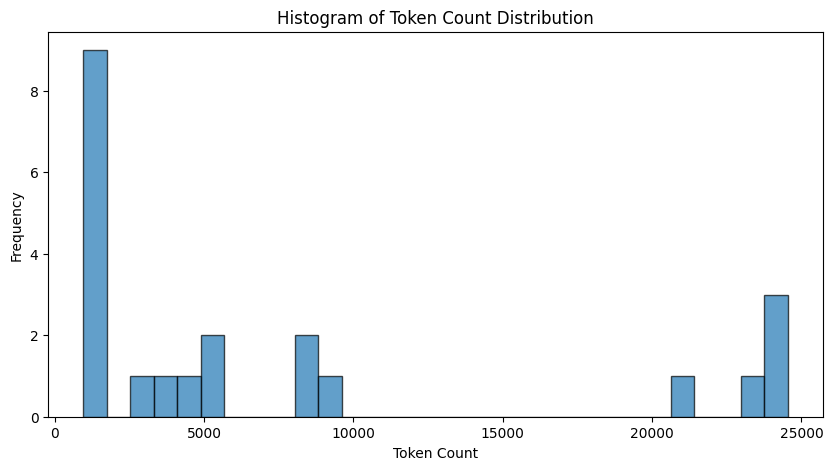

Processed 22 semantic chunks from the files in the folder.


In [24]:
import os
import re
import fitz  # PyMuPDF
import pytesseract
import io
from PIL import Image
import textract
# import pdfplumber
# from pdfminer.high_level import extract_text
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import docx
from transformers import GPT2TokenizerFast
from sentence_transformers import SentenceTransformer

# Initialize tokenizer and embedding model
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Function to count tokens
def count_tokens(text: str) -> int:
    return len(tokenizer.encode(text))

# Function to remove URLs
def remove_urls(text: str) -> str:
    url_pattern = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
    return re.sub(url_pattern, '', text)

# Function to remove headers, footers, page numbers, and publication notices
def remove_unnecessary_content(text: str) -> str:
    lines = text.split("\n")
    cleaned_lines = []

    for line in lines:
        line = line.strip()
        if re.match(r'^\s*\d+\s*$', line):
            continue
        if any(phrase in line.lower() for phrase in [
            "social security administration", "socialsecurity.gov",
            "publication no", "printed on recycled paper",
            "produced and published at u.s. taxpayer expense",
            "contacting us", "call us toll-free", "tty",
            "apply for most types of benefits"
        ]):
            continue
        if line:
            cleaned_lines.append(line)

    return "\n".join(cleaned_lines)

# Function to extract text from PDFs
# def extract_text_from_pdf(pdf_path: str) -> str:
#     text = ""
#     with pdfplumber.open(pdf_path) as pdf:
#         for page in pdf.pages:
#             extracted_text = page.extract_text()
#             if extracted_text:
#                 text += extracted_text + "\n"
#             else:
#                 image = page.to_image()
#                 img = image.original
#                 ocr_text = pytesseract.image_to_string(img)
#                 text += ocr_text + "\n"
#     return text.strip()


# def extract_text_from_pdf(pdf_path: str) -> str:
#     text = ""
#     doc = fitz.open(pdf_path)
#     for page_num in range(len(doc)):
#         page = doc.load_page(page_num)
#         text += page.get_text("text")
#     return text.strip()


def extract_text_from_pdf(pdf_path: str) -> str:
    text = ""
    doc = fitz.open(pdf_path)

    # Try to extract text using PyMuPDF
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        extracted_text = page.get_text("text")

        # If the page has text, add it to the result
        if extracted_text:
            text += extracted_text + "\n"
        else:
            # If no text found, try OCR
            pix = page.get_pixmap()  # Convert page to image
            img_data = pix.tobytes("png")  # Convert pixmap to image bytes
            img = Image.open(io.BytesIO(img_data))  # Open the image with PIL
            ocr_text = pytesseract.image_to_string(img)  # Perform OCR
            text += ocr_text + "\n"

    return text.strip()




# Function to extract text from DOCX
def extract_text_from_docx(docx_path: str) -> str:
    doc = docx.Document(docx_path)
    text = [para.text for para in doc.paragraphs]
    return '\n'.join(text)

# Function to clean and normalize text
def clean_text(text: str) -> str:
    text = text.strip()
    text = remove_urls(text)
    text = remove_unnecessary_content(text)
    return text

# Function to chunk text based on semantic similarity
def semantic_chunking(text, max_chunk_size=512):
    sentences = text.split(". ")  # Split into sentences
    embeddings = embedding_model.encode(sentences)

    chunks = []
    current_chunk = []

    for i, sentence in enumerate(sentences):
        if len(current_chunk) >= max_chunk_size:
            chunks.append(" ".join(current_chunk))
            current_chunk = []

        current_chunk.append(sentence)

    if current_chunk:
        chunks.append(" ".join(current_chunk))

    return chunks

# Function to save processed text
def save_text_to_file(text: str, output_folder: str, filename: str):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    output_path = os.path.join(output_folder, f"{filename}.txt")
    with open(output_path, 'w', encoding='utf-8') as f:
        f.write(text)
    print(f"Text saved to: {output_path}")

# Function to process files and apply semantic chunking
def process_files_in_folder(folder_path: str, output_folder: str):
    chunks = []
    token_counts = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if filename.endswith(".pdf"):
            print(f"Processing PDF: {filename}")
            text = extract_text_from_pdf(file_path)
        elif filename.endswith(".docx"):
            print(f"Processing DOCX: {filename}")
            text = extract_text_from_docx(file_path)
        else:
            continue

        cleaned_text = clean_text(text)
        save_text_to_file(cleaned_text, output_folder, filename)

        # Apply semantic chunking
        document_chunks = semantic_chunking(cleaned_text)
        chunks.extend(document_chunks)

        # Collect token counts
        token_counts.extend([count_tokens(chunk) for chunk in document_chunks])

    # Create histogram
    plt.figure(figsize=(10, 5))
    plt.hist(token_counts, bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel("Token Count")
    plt.ylabel("Frequency")
    plt.title("Histogram of Token Count Distribution")
    plt.show()

    return chunks

# Specify folders
folder_path = './Input_data_files'
output_folder = './Semantic_output_texts'

document_semantic_chunks = process_files_in_folder(folder_path, output_folder)

print(f"Processed {len(document_semantic_chunks)} semantic chunks from the files in the folder.")


# Recursive Character Text Chunking

In [27]:
# import os
# import re
# import textract
# import pdfplumber
# import pytesseract
# from PIL import Image
# import docx
# from transformers import GPT2TokenizerFast
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Initialize tokenizer
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

# Function to count tokens
def count_tokens(text: str) -> int:
    return len(tokenizer.encode(text))

# Function to remove URLs from text
def remove_urls(text: str) -> str:
    url_pattern = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
    return re.sub(url_pattern, '', text)

# Function to remove headers, footers, page numbers, and publication notices
def remove_unnecessary_content(text: str) -> str:
    lines = text.split("\n")
    cleaned_lines = []

    for line in lines:
        line = line.strip()

        # Remove page numbers (standalone numbers)
        if re.match(r'^\s*\d+\s*$', line):
            continue

        # Remove known repetitive headers/footers
        if any(phrase in line.lower() for phrase in [
            "social security administration", "socialsecurity.gov",
            "publication no", "printed on recycled paper",
            "produced and published at u.s. taxpayer expense",
            "contacting us", "call us toll-free", "tty",
            "apply for most types of benefits"
        ]):
            continue

        # Remove excessive whitespace and artifacts
        if line:
            cleaned_lines.append(line)

    return "\n".join(cleaned_lines)

# Function to extract text from PDFs (including OCR for images)
def extract_text_from_pdf(pdf_path: str) -> str:
    text = ""
    doc = fitz.open(pdf_path)

    # Try to extract text using PyMuPDF
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        extracted_text = page.get_text("text")

        # If the page has text, add it to the result
        if extracted_text:
            text += extracted_text + "\n"
        else:
            # If no text found, try OCR
            pix = page.get_pixmap()  # Convert page to image
            img_data = pix.tobytes("png")  # Convert pixmap to image bytes
            img = Image.open(io.BytesIO(img_data))  # Open the image with PIL
            ocr_text = pytesseract.image_to_string(img)  # Perform OCR
            text += ocr_text + "\n"

    return text.strip()

# Function to extract text from DOCX
def extract_text_from_docx(docx_path: str) -> str:
    doc = docx.Document(docx_path)
    text = []
    for para in doc.paragraphs:
        text.append(para.text)
    return '\n'.join(text)

# Function to clean and normalize text
def clean_text(text: str) -> str:
    text = text.strip()
    text = remove_urls(text)  # Remove URLs
    text = remove_unnecessary_content(text)  # Remove headers/footers, page numbers, etc.
    return text

# Function to save processed text into a new folder
def save_text_to_file(text: str, output_folder: str, filename: str):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    output_path = os.path.join(output_folder, f"{filename}.txt")

    with open(output_path, 'w', encoding='utf-8') as f:
        f.write(text)

    print(f"Text saved to: {output_path}")

# Function to process all files in the "data" folder
def process_files_in_folder(folder_path: str, output_folder: str):
    chunks = []

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        if filename.endswith(".pdf"):
            print(f"Processing PDF: {filename}")
            text = extract_text_from_pdf(file_path)

        elif filename.endswith(".docx"):
            print(f"Processing DOCX: {filename}")
            text = extract_text_from_docx(file_path)

        else:
            continue

        # Clean the extracted text
        cleaned_text = clean_text(text)

        # Save the cleaned text to a file
        save_text_to_file(cleaned_text, output_folder, filename)

        # Split text into chunks for retrieval
        text_splitter = RecursiveCharacterTextSplitter(
            chunk_size=512,
            chunk_overlap=24,
            length_function=count_tokens,
        )

        document_chunks = text_splitter.create_documents([cleaned_text])
        chunks.extend(document_chunks)  # Add chunks to the list

    return chunks

# Specify folders
folder_path = './Input_data_files'
output_folder = './Recursive_output_texts'

# Process the files and get the cleaned chunks
document_recursive_chunks = process_files_in_folder(folder_path, output_folder)

# Print summary
print(f"Processed {len(document_recursive_chunks)} chunks from the files in the folder.")


Processing PDF: Premium Fee Schedule.pdf
Text saved to: ./Recursive_output_texts/Premium Fee Schedule.pdf.txt
Processing DOCX: Premium Processing i-765.docx
Text saved to: ./Recursive_output_texts/Premium Processing i-765.docx.txt
Processing PDF: Policy - Use for electronic Signatures.pdf
Text saved to: ./Recursive_output_texts/Policy - Use for electronic Signatures.pdf.txt
Processing PDF: Policy - The Form I-20 and the English Proficiency Field.pdf
Text saved to: ./Recursive_output_texts/Policy - The Form I-20 and the English Proficiency Field.pdf.txt
Processing DOCX: Processing Time .docx
Text saved to: ./Recursive_output_texts/Processing Time .docx.txt
Processing DOCX: STEM OPT.docx
Text saved to: ./Recursive_output_texts/STEM OPT.docx.txt
Processing PDF: Evidence Definition.pdf
Text saved to: ./Recursive_output_texts/Evidence Definition.pdf.txt
Processing PDF: How to find form category.pdf
Text saved to: ./Recursive_output_texts/How to find form category.pdf.txt
Processing PDF: Pol

<Figure size 1000x600 with 0 Axes>

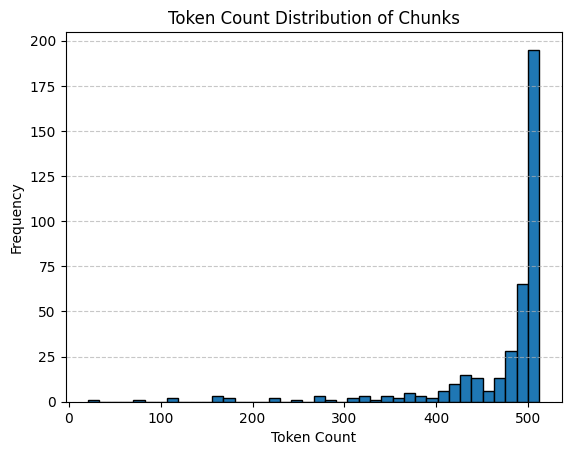

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a list of token counts
token_counts = [count_tokens(chunk.page_content) for chunk in document_recursive_chunks]

# Create a DataFrame from the token counts
df = pd.DataFrame({'Token Count': token_counts})

# Create a histogram of the token count distribution
plt.figure(figsize=(10, 6))
df.hist(bins=40, grid=False, edgecolor='black')

# Customize the plot
plt.title('Token Count Distribution of Chunks')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


#Embedding and Store to VectorDB

In [1]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Access the API keys
PINECONE_API_KEY = os.getenv("PINECONE_API_KEY")
HUGGINGFACE_API_KEY = os.getenv("HUGGINGFACE_API_KEY")

# # Use the API keys in your code
# print(f"API Key: {api_key}")
# print(f"Hugging Face Token: {huggingface_token}")


In [30]:
!pip install pinecone

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.4/421.4 KB 10.1 MB/s eta 0:00:00a 0:00:01


In [2]:
from pinecone import Pinecone, ServerlessSpec
from sentence_transformers import SentenceTransformer
import time

# Initialize Pinecone and embedding model
api_key = PINECONE_API_KEY  # Replace with your API key
pinecone = Pinecone(api_key=api_key)
index_name = "recursive-text-chunks"

/home/exouser/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/exouser/.local/lib/python3.10/site-packages/requests/__init__.py:113: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (2.3.0)/charset_normalizer (3.4.1) doesn't match a supported version!
  warnings.warn(


In [32]:
# Create a serverless Pinecone index if it doesn't exist
if index_name not in pinecone.list_indexes():
    pinecone.create_index(
        name=index_name,
        dimension=384,  # Dimension of the embedding model
        metric="cosine",
        spec=ServerlessSpec(cloud="aws", region="us-east-1")
    )
    time.sleep(30)  # Wait for index to be initialized

In [33]:
index = pinecone.Index(index_name)
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Store document chunks in Pinecone
# Assuming document_chunks are Document objects, extract the text from them
for i, chunk in enumerate(document_recursive_chunks):
    # Extract text from the Document object (common attribute names: 'text' or 'page_content')
    text = getattr(chunk, 'text', '') or getattr(chunk, 'page_content', '')

    if not text:
        raise ValueError("Document chunk is empty or invalid.")

    embedding = embedding_model.encode(text).tolist()
    index.upsert(vectors=[(f"chunk-{i}", embedding, {"text": text})])

print(f"Stored {len(document_recursive_chunks)} chunks in Pinecone.")



Stored 388 chunks in Pinecone.


In [34]:
# Function to query Pinecone
def query_pinecone(query_text, top_k=5):
    query_embedding = embedding_model.encode(query_text).tolist()
    results = index.query(vector=query_embedding, top_k=top_k, include_metadata=True)

    print("Top matching chunks:")
    for match in results["matches"]:
        print(f"Score: {match['score']}")
        print(f"Chunk: {match['metadata']['text']}")
        print("-" * 50)

# Example query
query_text = "What is the eligibility criteria for F-1 OPT?"
query_pinecone(query_text)

Top matching chunks:
Score: 0.678619564
Chunk: gap extension of F-1 status and OPT?...................................................................
9.2.3.
What appears on the Form I-20 if an F-1 student is eligible for the cap gap
extension of F-1 status but not OPT?.....................................................................
9.3.
Issues with SEVIS and the cap gap extension ......................................................................
9.3.1.
What if SEVIS does not show that an eligible student’s work authorization and
status have been extended? ..................................................................................
9.3.2.
What are the responsibilities of the DSO for ensuring that SEVIS properly shows
the student has a cap gap extension?....................................................................
9.4.
Student responsibilities during the cap gap extension...........................................................
9.4.1.
If a student is eligible for

# Query and Generate Output

In [ ]:
# !pip install -q transformers torch

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [3]:
# !pip install -U "huggingface_hub[cli]"
token = HUGGINGFACE_API_KEY

In [ ]:
# !git config --global credential.helper store

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [39]:
# !huggingface-cli login
from huggingface_hub import login

# Log in using the token
login(token)

In [40]:
from transformers import pipeline

# Initialize the text-generation pipeline with meta-llama/Llama-3.2-3B-Instruct model
pipe = pipeline("text-generation", model="meta-llama/Llama-3.2-3B-Instruct")


Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]
Device set to use cuda:0


In [ ]:
# # Function to query Pinecone and generate an answer with the Llama model
# def query_pinecone_and_generate_answer(query_text, top_k=5):
#     # Query Pinecone to get relevant chunks (same as before)
#     query_embedding = embedding_model.encode(query_text).tolist()
#     results = index.query(vector=query_embedding, top_k=top_k, include_metadata=True)

#     # Concatenate the top results into a prompt for the Llama model
#     context = "\n".join([match['metadata']['text'] for match in results["matches"]])

#     # Format the prompt for the Llama model
#     prompt = f"Answer the following question based on the context below:\n{context}\n\nQuestion: {query_text}\nAnswer:"

#     # Use the pipeline to generate the answer
#     generated_answer = pipe(prompt, max_length=512, num_return_sequences=1, temperature=0.7, top_p=0.9)

#     # Print the generated answer
#     print("Generated Answer:", generated_answer[0]['generated_text'])

# # Example query related to F-1 OPT and CPT
# query_text = "What is the eligibility criteria for F-1 OPT?"
# query_pinecone_and_generate_answer(query_text)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


ValueError: Input length of input_ids is 512, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_length` or, better yet, setting `max_new_tokens`.

In [42]:
import torch
from transformers import pipeline

# Function to get the best available device
def get_device():
    if torch.cuda.is_available():
        try:
            torch.cuda.empty_cache()  # Clear unused memory
            return torch.device("cuda")
        except RuntimeError:
            print("GPU out of memory. Falling back to CPU.")
    return torch.device("cpu")

device = get_device()

# Try initializing the model on GPU first, fallback to CPU if OOM error occurs
try:
    pipe = pipeline(
        "text-generation",
        model="meta-llama/Llama-3.2-3B-Instruct",
        device=0 if device.type == "cuda" else -1  # 0 for GPU, -1 for CPU
    )
    print(f"Using device: {device}")
except RuntimeError as e:
    if "out of memory" in str(e).lower():
        print("GPU ran out of memory. Switching to CPU.")
        pipe = pipeline("text-generation", model="meta-llama/Llama-3.2-3B-Instruct", device=-1)
    else:
        raise e

# Function to query Pinecone and generate an answer with the Llama model
def query_pinecone_and_generate_answer(query_text, top_k=5):
    global embedding_model, index
    if 'embedding_model' not in globals() or 'index' not in globals():
        raise ValueError("Embedding model and index must be defined before running the function.")

    # Query Pinecone to get relevant chunks
    query_embedding = embedding_model.encode(query_text).tolist()
    results = index.query(vector=query_embedding, top_k=top_k, include_metadata=True)

    # Concatenate the top results into a prompt for the Llama model
    context = "\n".join([match['metadata']['text'] for match in results.get("matches", [])])

    # Format the prompt for the Llama model
    prompt = f"Answer the following question based on the context below:\n{context}\n\nQuestion: {query_text}\nAnswer:"

    # Use the pipeline to generate the answer with `max_new_tokens`
    generated_answer = pipe(prompt, max_new_tokens=100, num_return_sequences=1, temperature=0.7, top_p=0.9)

    # Print the generated answer
    print("Generated Answer:", generated_answer[0]['generated_text'])

# Example query related to F-1 OPT and CPT
query_text = "What is the eligibility criteria for F-1 OPT?"
query_pinecone_and_generate_answer(query_text)


Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]
Device set to use cuda:0


Using device: cuda


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Generated Answer: Answer the following question based on the context below:
gap extension of F-1 status and OPT?...................................................................
9.2.3.
What appears on the Form I-20 if an F-1 student is eligible for the cap gap
extension of F-1 status but not OPT?.....................................................................
9.3.
Issues with SEVIS and the cap gap extension ......................................................................
9.3.1.
What if SEVIS does not show that an eligible student’s work authorization and
status have been extended? ..................................................................................
9.3.2.
What are the responsibilities of the DSO for ensuring that SEVIS properly shows
the student has a cap gap extension?....................................................................
9.4.
Student responsibilities during the cap gap extension...........................................................
9.4.1.